# Ανίχνευση της Θερμογένεσης του Φαιού Λιπώδους Ιστού 
## Στην περιοχή γύρω από τον αυχένα
1. Αρχικά δείχνουμε την επεξεργασία μίας εικόνας που οδηγεί στην αφαίρεση του background
2. Αυτό οδηγεί σε μία binary μάσκα
3. Στη συνέχεια κατασκευάζουμε μια εικόνα με τα csv δεδομένα

## Εικόνες για τη γενική ανατομία του λιπώδους ιστού
### Εξέλιξη της φαιoποίησης του λευκού λιπώδους ιστού σε διαφορετικά ποντίκια υπό κρύο περιβάλλον
Στην εικόνα οι υποδόριες και σπλαχνικές αποθήκες τεμαχίστηκαν και τοποθετήθηκαν σε ένα πρότυπο ποντικιού ώστε να φανεί η σχετική τοποθεσία τους στο σώμα. 
Το ποντίκι στα αριστερά διατηρήθηκε σε θερμοκρασίες κοντά στη θερμο-ουδετερότητα (28℃ για 10 ημέρες), ενώ το ποντίκι στα δεξιά προσαρμόστηκε σε κρύο περιβάλλον (6℃ για 10 ημέρες). Η φαιοποίηση του λιπώδους οργάνου είναι εμφανής στον θερμικά προσαρμοσμένο ποντίκι. 
* Το λιπώδες όργανο αποτελείται από δυο υποδόριες αποθήκες: 
    - (Α) πρόσθια (βαθιά αυχενική, επιφανειακή αυχενική, ενδοκεφαλική, υποκεφαλική, αξιλο-θωρακική) 
    - (F) οπίσθια (ραχιαίος-οσφυϊκός, βουβωνικός, γλουτιαίος), 
    - και από αρκετές σπλαχνικές αποθήκες: 
        - (Β) μεσοθωρακικό, 
        - (C) μεσεντερικό, 
        - (D) ρετρό-περιτοναϊκό και
        - (Ε) κοιλιακό-πυελικό (περινεναλικός, περιατοβαρικός, παραμετρικός, περικοκικός).

Ράβδος κλίμακας: 1 cm. Το λιπώδες όργανο των ποντικών Sv129 περιέχει τον επιπολασμό των καφέ λιποκυττάρων και δείχνει την πλαστικότητα μετά από κρύα έκθεση. 
![ανατομική εικόνα](img/giorgano.png)

## Περιοχές ενδιαφέροντος 
### Στο notebook ερευνάται η περίπτωση του BAT

| WAT Location            | BAT Location |
| ------------------------- | ------------------------- |
| ![something](img/wat_location.jpg)  | ![something](img/bat_location.jpg) |

In [59]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [60]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob

from skimage.exposure import histogram
from skimage.util import img_as_ubyte

from src.features import mouse_detection
from src.data import initial_data_pick

- Παράδειγμα:
    - χρήση όλων των θερμικών εικόνων στο directory `/data/raw/0h/mouse_1`
    - χρήση των csv των εικόνων 
    - εξαγωγή των μασκών των αντικειμένων, και τα bounding box 
    - ορθογώνιο patch με βάση το bounding box

In [62]:
infrared_images = [] # stores (238, 98) arrays etc
items = glob(module_path + '/data/raw/0h/mouse_1/IR_*')
for item in items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # stores (240, 160) arrays
items = glob(module_path + '/data/raw/0h/mouse_1/CSV_*')
for item in items:
    csv_files.append(initial_data_pick.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]

example = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

### Demonstration για μια εικόνα 

<AxesSubplot:title={'center':'CSV values'}>

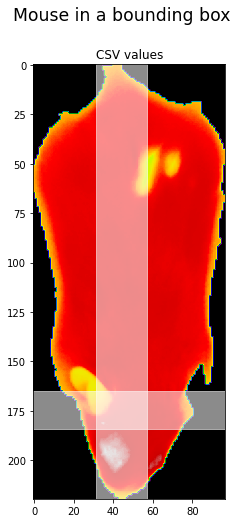

In [63]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Mouse in a bounding box', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

ax0.imshow(X=example[0], cmap=plt.cm.nipy_spectral)
#ax0.axvline(x=new[0].shape[1]/2, c='black')
#ax0.axvline(x=new[0].shape[1]/2, c='red')
xmin = int(0.35*image.shape[1])
xmax = int(0.65*image.shape[1])
ymin = int(0.70*image.shape[0])
ymax = int(0.78*image.shape[0])
ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
#ax0.axhline(y=new[0].shape[0]/2 + infrared_images[0].shape[0], c='yellow')
#ax0.axhline(y=optical_images[0].shape[0]/2 - infrared_images[0].shape[0], c='green')
ax0.set_title(label='CSV values')
fig.add_subplot(ax0)

### Demonstation για όλο το directory `/data/raw/0h/mouse_1`

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 21.67it/s]


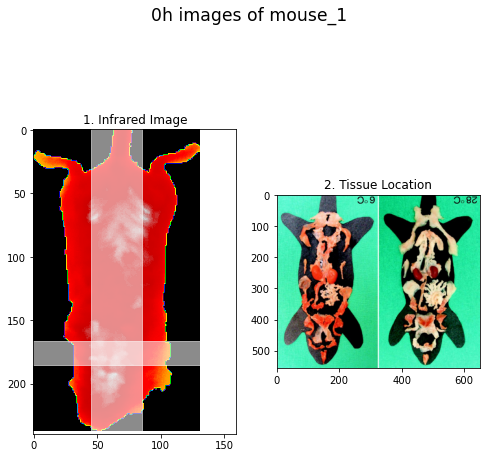

In [65]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='0h images of mouse_1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax0.set_title(label='1. Infrared Image')
ax1.set_title(label='2. Tissue Location')
camera = Camera(fig)
for image in tqdm(example):
    ax1.imshow(X=imread('img/tissues.png'))
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=500)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

# Ανιχνεύεται η συμπεριφορά του φαιού λιπώδους ιστού;
## Η καταγραφή για εννέα ορθογώνια δείγματα στα πέντε ποντίκια του πειράματος
### Επιλογή εικόνων για τη μέτρηση της μέσης θερμοκρασίας και της τυπικής απόκλισης
Στο αρχείο bat_list.yml έχουμε ορίσει από ποιες εικόνες θα καταγράψουμε τη μέση θερμοκρασία ενός τετραγωνικού patch το οποίο βρίσκεται στον αυχένα ενός ποντικιού, όπως φαίνεται στην παραπάνω εικόνα. 

Δομή του αρχείου yaml: 
```
samples: [0h, 24h, 48h, 72h, 96h, 120h, 144h, 192h, 240h]
mouse_1:
  csv: [CSV_2060.csv, CSV_2305.csv, CSV_2509.csv, CSV_2730.csv, CSV_2957.csv, CSV_3181.csv, CSV_3397.csv, CSV_3652.csv, CSV_3855.csv]
  jpeg: [IR_2060.jpg, IR_2305.jpg, IR_2509.jpg, IR_2730.jpg, IR_2957.jpg, IR_3181.jpg, IR_3397.jpg, IR_3652.jpg, IR_3855.jpg]
.
.
. κλπ
```

In [75]:
# Εισαγωγή του αρχείου yaml
import yaml
import numpy as np
from src.features import img_to_vectors
with open(module_path + '/data/bat_list.yml') as file:
    experiment = yaml.load(file, Loader=yaml.FullLoader)

9it [00:00, 121.97it/s]

['mouse_5']
sample: #0
Body : shape: (231, 97), area: 15031 Mean Temp: 33.579014436830555  Std Temp: 1.3182657196516776
Patch : shape: (19, 30), area: 570 Mean Temp: 34.795573684210524  Std Temp: 0.4967167384484316
sample: #1
Body : shape: (238, 100), area: 16911 Mean Temp: 31.861586127372718  Std Temp: 1.4353014943392979
Patch : shape: (19, 30), area: 570 Mean Temp: 33.07115438596491  Std Temp: 0.28562476431418765
sample: #2
Body : shape: (234, 121), area: 17991 Mean Temp: 31.922226390973265  Std Temp: 1.6519994264502385
Patch : shape: (19, 36), area: 684 Mean Temp: 33.3336783625731  Std Temp: 0.7605457405376421
sample: #3
Body : shape: (238, 102), area: 17455 Mean Temp: 31.828034431395018  Std Temp: 1.4825451786439843
Patch : shape: (19, 31), area: 589 Mean Temp: 32.91855178268251  Std Temp: 0.5896235017399855
sample: #4
Body : shape: (236, 95), area: 15832 Mean Temp: 32.13978303436079  Std Temp: 1.3844437713194107
Patch : shape: (19, 28), area: 532 Mean Temp: 32.81373872180451  Std 

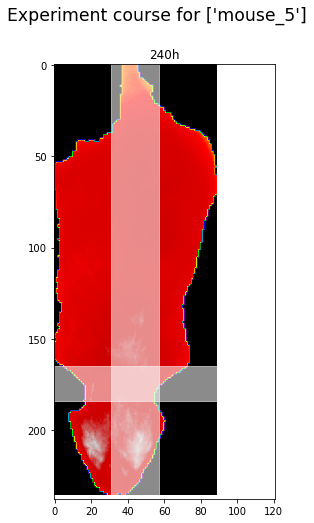

In [35]:
# Πρόσβαση στα δεδομένα του αρχείου
# mouse_names = ['mouse_1', 'mouse_2', 'mouse_3', 'mouse_4', 'mouse_5']
mouse_names = ['mouse_5']
# Κατασκευή των global path για τα αρχεία του πειράματος
infrared_items = []
csv_items = []
for mouse_name in mouse_names:
    for hour, jpeg_file in zip(experiment['samples'], experiment[mouse_name]['jpeg']):
        full_jpeg_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + jpeg_file
        infrared_items.append(full_jpeg_path)

    for hour, csv_file in zip(experiment['samples'], experiment[mouse_name]['csv']):
        full_csv_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + csv_file
        csv_items.append(full_csv_path)
# Εισαγωγή των δεδομένων με βάση τα path και οι προεπεξεργασίες τους
infrared_images = [] # stores (238, 98) arrays etc
for item in infrared_items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)
csv_files = [] # stores (240, 160) arrays
for item in csv_items:
    csv_files.append(initial_data_pick.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]
new = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t=f'Experiment course for {mouse_names}', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

mean_roi_temp = []
roi_area_area = []
std_roi = []
camera = Camera(fig)
print(f'{mouse_names}')
for i, (image, sample) in tqdm(enumerate(zip(new, experiment['samples']))):
    ordinatesX, ordinatesY = img_to_vectors.img_to_vectors(image)
    intensityFeature = image[ordinatesX, ordinatesY]
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    roi_area = image[ymin:ymax, xmin:xmax]
    std_roi.append(np.std(roi_area))
    mean_roi_temp.append(np.mean(roi_area))
    roi_area_area.append(roi_area.size)
    print(f'sample: #{i}')
    print(f'Body : shape: {image.shape}, area: {intensityFeature.size} Mean Temp: {np.mean(intensityFeature)}  Std Temp: {np.std(intensityFeature)}')
    print(f'Patch : shape: {roi_area.shape}, area: {roi_area.size} Mean Temp: {np.mean(roi_area)}  Std Temp: {np.std(roi_area)}')
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    ax0.set_title(label=sample)
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)    
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=1000)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

In [13]:
mean_roi_temp1 = mean_roi_temp
roi_area_area1 = roi_area_area
std_roi1 = std_roi

In [15]:
mean_roi_temp2 = mean_roi_temp
roi_area_area2 = roi_area_area
std_roi2 = std_roi

In [17]:
mean_roi_temp3 = mean_roi_temp
roi_area_area3 = roi_area_area
std_roi3 = std_roi

In [19]:
mean_roi_temp4 = mean_roi_temp
roi_area_area4 = roi_area_area
std_roi4 = std_roi

In [21]:
mean_roi_temp5 = mean_roi_temp
roi_area_area5 = roi_area_area
std_roi5 = std_roi

<AxesSubplot:xlabel='Sample Hours'>

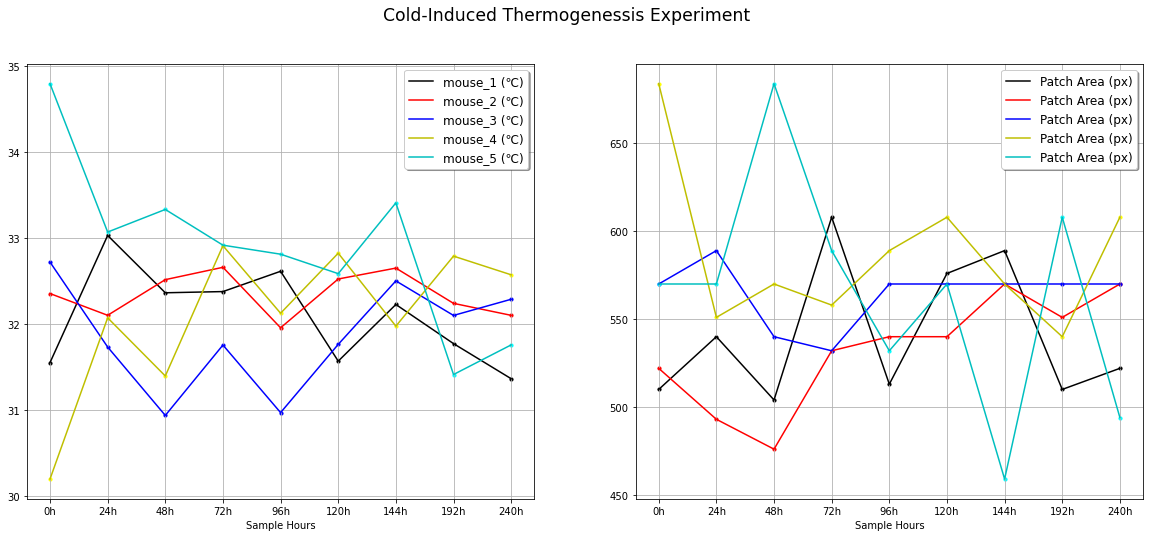

In [22]:
fig = plt.figure(figsize=(20, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])

ax.grid(True)
ax.plot(np.arange(0, 9, 1), mean_roi_temp1, 'k', label='mouse_1 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp1, c='black', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp2, 'r', label='mouse_2 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp2, c='red', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp3, 'b', label='mouse_3 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp3, c='blue', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp4, 'y', label='mouse_4 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp4, c='yellow', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp5, 'c', label='mouse_5 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp5, c='cyan', s=10)
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

ax = fig.add_subplot(grid[1])

ax.grid(True)
ax.plot(np.arange(0, 9, 1), roi_area_area1, 'k', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area1, c='black', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area2, 'r', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area2, c='red', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area3, 'b', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area3, c='blue', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area4, 'y', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area4, c='yellow', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area5, 'c', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area5, c='cyan', s=10)

ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

Με αποτύπωση bar plots τα οποία περιέχουν και την τυπική απόκλιση

Text(0.5, 0, 'Sample Hours')

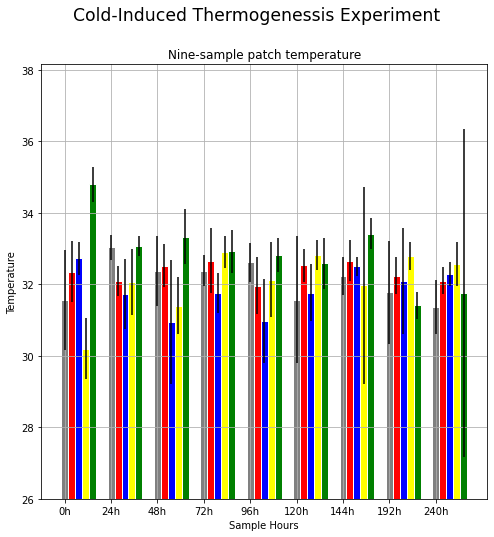

In [57]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.15
 
# set heights of bars
bars1 = tuple(mean_roi_temp1)
bars2 = tuple(mean_roi_temp2)
bars3 = tuple(mean_roi_temp3)
bars4 = tuple(mean_roi_temp4)
bars5 = tuple(mean_roi_temp5)
std1 = tuple(std_roi1)
std2 = tuple(std_roi2)
std3 = tuple(std_roi3)
std4 = tuple(std_roi4)
std5 = tuple(std_roi5)

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
ax.bar(r1, bars1, yerr=std1, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, bars2, yerr=std2, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, bars3, yerr=std3, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, bars4, yerr=std4, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, bars5, yerr=std5, color='green', width=barWidth, edgecolor='white', label='var5')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
ax.set_xlabel(xlabel='Sample Hours')
# Create legend & Show graphic
# plt.legend()
# plt.show()

Text(0.5, 0, 'Mouse #')

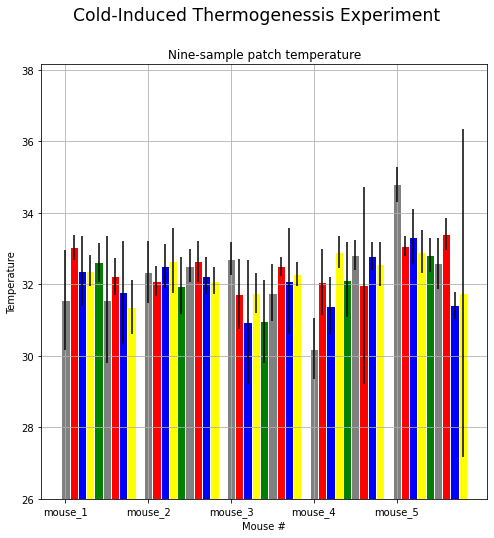

In [76]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.1

# set heights of bars
bars1 = tuple([mean_roi_temp1[0], mean_roi_temp2[0], mean_roi_temp3[0], mean_roi_temp4[0], mean_roi_temp5[0]])
bars2 = tuple([mean_roi_temp1[1], mean_roi_temp2[1], mean_roi_temp3[1], mean_roi_temp4[1], mean_roi_temp5[1]])
bars3 = tuple([mean_roi_temp1[2], mean_roi_temp2[2], mean_roi_temp3[2], mean_roi_temp4[2], mean_roi_temp5[2]])
bars4 = tuple([mean_roi_temp1[3], mean_roi_temp2[3], mean_roi_temp3[3], mean_roi_temp4[3], mean_roi_temp5[3]])
bars5 = tuple([mean_roi_temp1[4], mean_roi_temp2[4], mean_roi_temp3[4], mean_roi_temp4[4], mean_roi_temp5[4]])
bars6 = tuple([mean_roi_temp1[5], mean_roi_temp2[5], mean_roi_temp3[5], mean_roi_temp4[5], mean_roi_temp5[5]])
bars7 = tuple([mean_roi_temp1[6], mean_roi_temp2[6], mean_roi_temp3[6], mean_roi_temp4[6], mean_roi_temp5[6]])
bars8 = tuple([mean_roi_temp1[7], mean_roi_temp2[7], mean_roi_temp3[7], mean_roi_temp4[7], mean_roi_temp5[7]])
bars9 = tuple([mean_roi_temp1[8], mean_roi_temp2[8], mean_roi_temp3[8], mean_roi_temp4[8], mean_roi_temp5[8]])

std1 = tuple([std_roi1[0], std_roi2[0], std_roi3[0], std_roi4[0], std_roi5[0]])
std2 = tuple([std_roi1[1], std_roi2[1], std_roi3[1], std_roi4[1], std_roi5[1]])
std3 = tuple([std_roi1[2], std_roi2[2], std_roi3[2], std_roi4[2], std_roi5[2]])
std4 = tuple([std_roi1[3], std_roi2[3], std_roi3[3], std_roi4[3], std_roi5[3]])
std5 = tuple([std_roi1[4], std_roi2[4], std_roi3[4], std_roi4[4], std_roi5[4]])
std6 = tuple([std_roi1[5], std_roi2[5], std_roi3[5], std_roi4[5], std_roi5[5]])
std7 = tuple([std_roi1[6], std_roi2[6], std_roi3[6], std_roi4[6], std_roi5[6]])
std8 = tuple([std_roi1[7], std_roi2[7], std_roi3[7], std_roi4[7], std_roi5[7]])
std9 = tuple([std_roi1[8], std_roi2[8], std_roi3[8], std_roi4[8], std_roi5[8]])

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
ax.bar(r1, bars1, yerr=std1, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, bars2, yerr=std2, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, bars3, yerr=std3, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, bars4, yerr=std4, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, bars5, yerr=std5, color='green', width=barWidth, edgecolor='white', label='var5')
ax.bar(r6, bars6, yerr=std6, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r7, bars7, yerr=std7, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r8, bars8, yerr=std8, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r9, bars9, yerr=std9, color='yellow', width=barWidth, edgecolor='white', label='var4')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 5, 1))
ax.set_xticklabels(labels=experiment['mouse_id'])
ax.set_xlabel(xlabel='Mouse #')